# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1.Which variables are significant in predicting the demand for shared bikes.
2.How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Data loading and understanding

In [1253]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1324]:
#Importing dataset
bikedf = pd.read_csv('day.csv')

In [1255]:
#Let's explore the top 5 rows
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1256]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Data cleaning & Preparation

DATA QUALITY CHECK

In [1257]:
# Check for missing values in columns
print(bikedf.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [1258]:
# row-wise null count check
print(bikedf.isnull().sum(axis=1))
print(bikedf.isnull().sum(axis=1).max())
#There are no missing / Null values either in columns or rows

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64
0


In [1259]:
# Checking for duplicates
print("Number of duplicate rows: ", bikedf.duplicated().sum())
#there were zero duplicate values in the dataset.

Number of duplicate rows:  0


In [1260]:
# check for columns with constant/default values
constant_columns = [col for col in bikedf.columns if bikedf[col].nunique() == 1]
print("List of columns with constant/default values: ",constant_columns)
#there were no columns with this usecase

List of columns with constant/default values:  []


In [1325]:
#Removing redundant & unwanted columns
#Since we already have seperate columns for 'year' & 'month', we donot need this column.
bikedf=bikedf.drop(['dteday'], axis=1)

In [1326]:
# dropping columns casual and registered as cnt is the sum of these 2 columns.Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. 
bikedf = bikedf.drop(["casual","registered"], axis = 1)

In [1331]:
#record index column instant can be dropped
bikedf = bikedf.drop(["instant"], axis = 1)

In [1327]:
season_mapping={1:"season_spring",2:"season_summer", 3:"season_fall", 4:"season_winter"}
bikedf['season'] = bikedf['season'].map(season_mapping)

In [1328]:
weather_mapping={1:"weather_clear",2:"weather_Mist", 3:"weather_light_snow_rain",4:"weather_heavy_rain_ice"}
#{1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
bikedf['weathersit'] = bikedf['weathersit'].map(weather_mapping)

In [1329]:
#month_mapping={1:"Quarter_JanFebMar",2:"Quarter_JanFebMar", 3:"Quarter_JanFebMar",4:"Quarter_AprMayJun",5:"Quarter_AprMayJun",6:"Quarter_AprMayJun", 7:"Quarter_JulAugSep",8:"Quarter_JulAugSep",9:"Quarter_JulAugSep",10:"Quarter_OctNovDec", 11:"Quarter_OctNovDec",12:"Quarter_OctNovDec"}

month_mapping={1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'}
bikedf['mnth'] = bikedf['mnth'].map(month_mapping)

In [1332]:
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,season_spring,0,january,0,6,0,weather_Mist,14.110847,18.18125,80.5833,10.749882,985
1,season_spring,0,january,0,0,0,weather_Mist,14.902598,17.68695,69.6087,16.652113,801
2,season_spring,0,january,0,1,1,weather_clear,8.050924,9.47025,43.7273,16.636703,1349
3,season_spring,0,january,0,2,1,weather_clear,8.200000,10.60610,59.0435,10.739832,1562
4,season_spring,0,january,0,3,1,weather_clear,9.305237,11.46350,43.6957,12.522300,1600


# Exploratory Data Analysis (EDA)
Let's now spend some time doing what is arguably the most important step - understanding the data.

#### Visualising Categorical Variables

In [1333]:
# Convert to 'category' data type
bikedf['season']=bikedf['season'].astype('category')
bikedf['weathersit']=bikedf['weathersit'].astype('category')
bikedf['mnth']=bikedf['mnth'].astype('category')
bikedf['weekday']=bikedf['weekday'].astype('category')
#bikedf['yr']=bikedf['yr'].astype('category')
#bikedf['workingday']=bikedf['workingday'].astype('category')
bikedf['holiday']=bikedf['holiday'].astype('category')


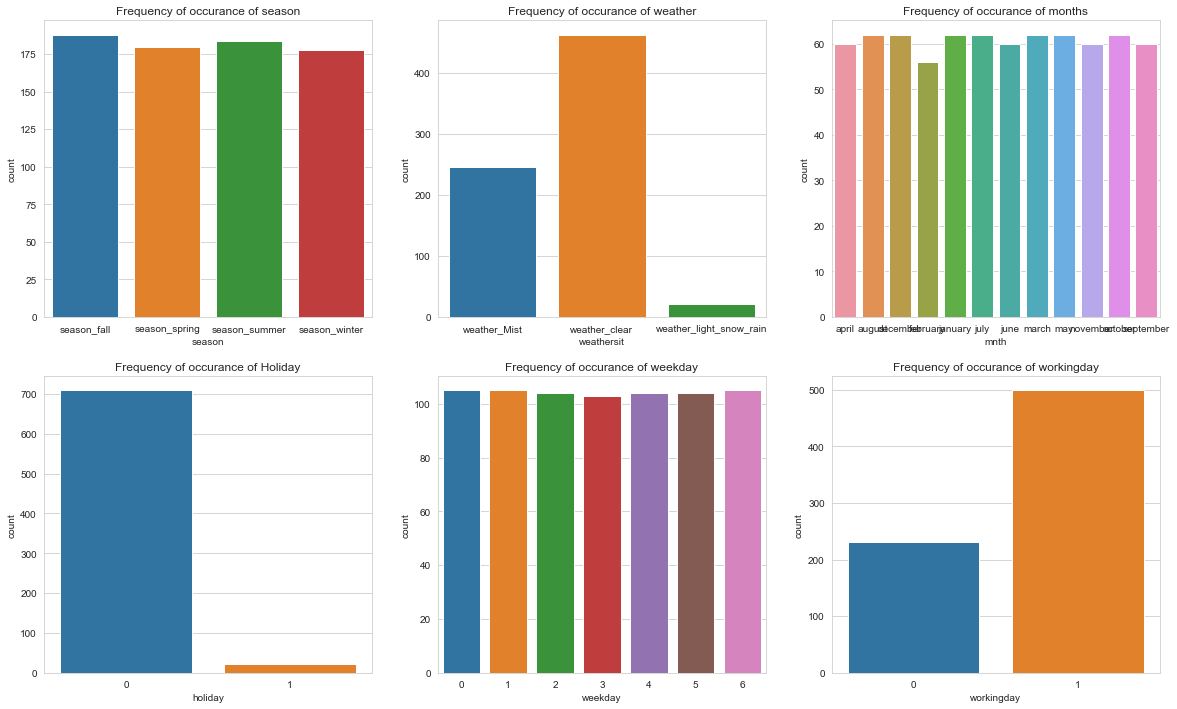

In [1270]:
#univariate analysis
#distribution of records for each categoricsl values can be listed to get better understanding of data set
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.xlabel('Season')
plt.ylabel("Count")
plt.title('Frequency of occurance of season')
sns.countplot(x = 'season', data = bikedf)
plt.subplot(2,3,2)
plt.xlabel('Weather')
plt.ylabel("Count")
plt.title('Frequency of occurance of weather')
sns.countplot(x = 'weathersit', data = bikedf)
plt.subplot(2,3,3)
plt.xlabel('Month')
plt.ylabel("Count")
plt.title('Frequency of occurance of months')
sns.countplot(x = 'mnth', data = bikedf)
plt.subplot(2,3,4)
plt.xlabel('Holiday')
plt.ylabel("Count")
plt.title('Frequency of occurance of Holiday')
sns.countplot(x = 'holiday', data = bikedf)
plt.subplot(2,3,5)
plt.xlabel('weekday')
plt.ylabel("Count")
plt.title('Frequency of occurance of weekday')
sns.countplot(x = 'weekday', data = bikedf)
plt.subplot(2,3,6)
plt.xlabel('workingday')
plt.ylabel("Count")
plt.title('Frequency of occurance of workingday')
sns.countplot(x = 'workingday', data = bikedf)
plt.show()

Occurance of working day records in data set is higher than non working day records. Similarly holiday records are very less. Distribution of records with different types of season,month and weekday are almost same. Higher frequency of records has been observed for clear wheather

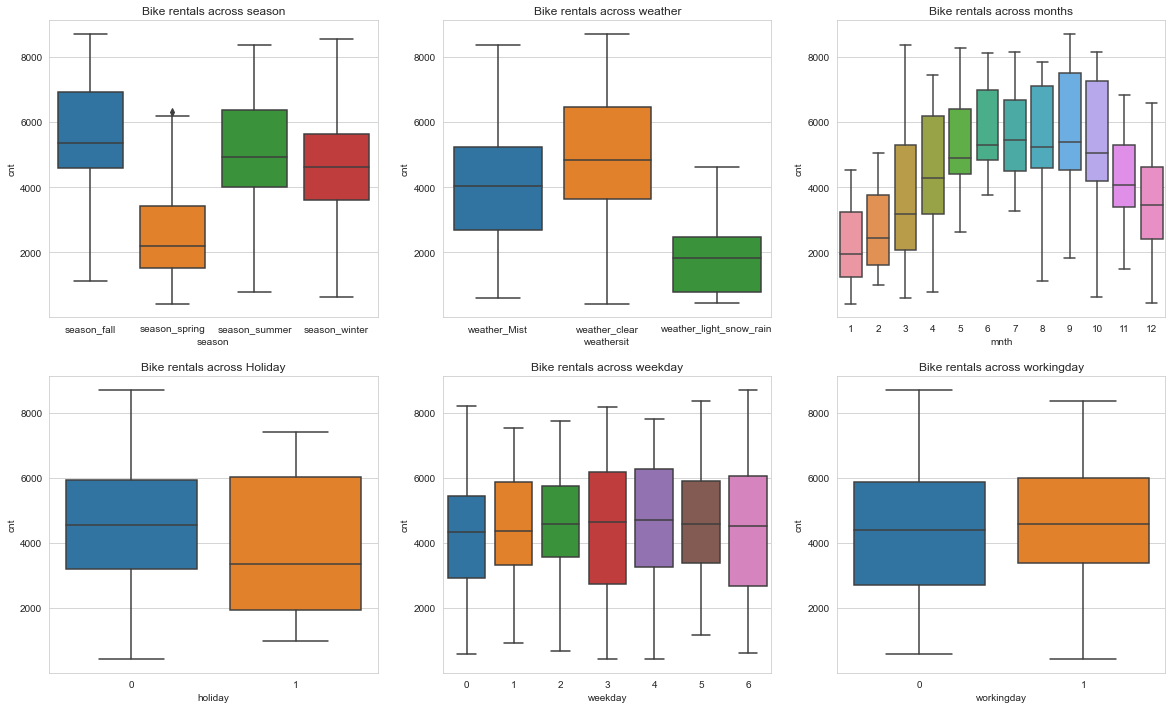

In [1117]:
#Bivariate analysis
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.xlabel('Season')
plt.title('Bike rentals across season')
sns.boxplot(x = 'season', y = 'cnt', data = bikedf)
plt.subplot(2,3,2)
plt.xlabel('Weather')
plt.title('Bike rentals across weather')
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikedf)
plt.subplot(2,3,3)
plt.xlabel('Month')
plt.title('Bike rentals across months')
sns.boxplot(x = 'mnth', y = 'cnt', data = bikedf)
plt.subplot(2,3,4)
plt.xlabel('Holiday')
plt.title('Bike rentals across Holiday')
sns.boxplot(x = 'holiday', y = 'cnt', data = bikedf)
plt.subplot(2,3,5)
plt.xlabel('weekday')
plt.title('Bike rentals across weekday')
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedf)
plt.subplot(2,3,6)
plt.xlabel('workingday')
plt.title('Bike rentals across workingday')
sns.boxplot(x = 'workingday', y = 'cnt', data = bikedf)
plt.show()


Observations:

- Season:
Bike reservations peak during the Summer and Fall seasons and are at their lowest during Spring. Additionally, there are more rentals in Winter compared to Spring. This suggests that the season can serve as a valuable predictor for the dependent variable.

- Weathersit:
Higher bike rentals are observed when the weather is clear and sunny. Interestingly, there are no instances of rentals during heavy snow or rain conditions. Therefore, weather conditions appear to be a promising predictor for the dependent variable.

- Month (mnth):
The demand for bike rentals varies across months, with the lowest demand occurring in January. In contrast, September sees the highest number of rentals. These fluctuations suggest that the month has a discernible trend for bookings and may be a meaningful predictor for the dependent variable.

- Holiday:
Bike rentals are notably lower on holidays when compared to working days.

- Weekday:
On weekdays, the median number of bookings falls within the range of 4,000 to 5,000. It is uncertain whether this variable will have a significant influence on the predictor. Therefore, the model will determine whether it should be included.

- Workingday:
The majority of bike rentals occur on working days. However, it's worth noting that the median number of rentals on both working and non-working days is close to 5,000. This suggests that the variable "workingday" could be a valuable predictor for the dependent variable.

In [1334]:
# Dropping outliers in Categorical Variables 
bikedf = bikedf.drop(index = bikedf[(bikedf['season'] == 'season_spring') & (bikedf['cnt'] > 7000)].index)
bikedf = bikedf.drop(index = bikedf[(bikedf['season'] == 'season_winter') & (bikedf['cnt'] < 500)].index)

#### Visualizing Numerical values

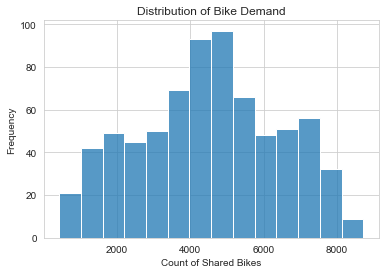

In [1275]:
#univariate analysis
# Visualize the target variable
sns.histplot(bikedf['cnt'])
plt.title('Distribution of Bike Demand')
plt.xlabel('Count of Shared Bikes')
plt.ylabel('Frequency')
plt.show()

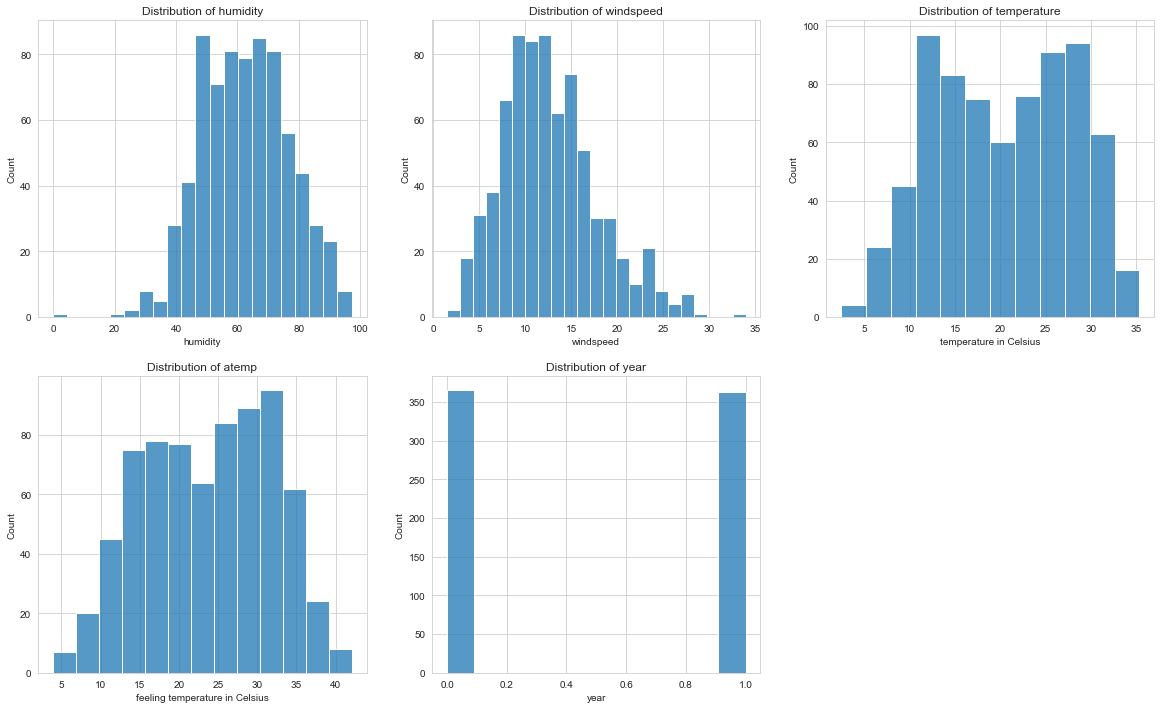

In [1276]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.xlabel('humidity')
plt.ylabel("Count")
plt.title('Distribution of humidity')
sns.histplot(bikedf['hum'])
plt.subplot(2,3,2)
plt.xlabel('windspeed')
plt.ylabel("Count")
plt.title('Distribution of windspeed')
sns.histplot(bikedf['windspeed'])
plt.subplot(2,3,3)
plt.xlabel('temperature in Celsius')
plt.ylabel("Count")
plt.title('Distribution of temperature')
sns.histplot(bikedf['temp'])
plt.subplot(2,3,4)
plt.xlabel('feeling temperature in Celsius')
plt.ylabel("Count")
plt.title('Distribution of atemp')
sns.histplot(bikedf['atemp'])
plt.subplot(2,3,5)
plt.xlabel('year')
plt.ylabel("Count")
plt.title('Distribution of year')
sns.histplot(bikedf['yr'])
plt.show()

Looking at year by year rentals, 2019 has had a median 2000 increase in rentals compared to 2018.

C:\Temp\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


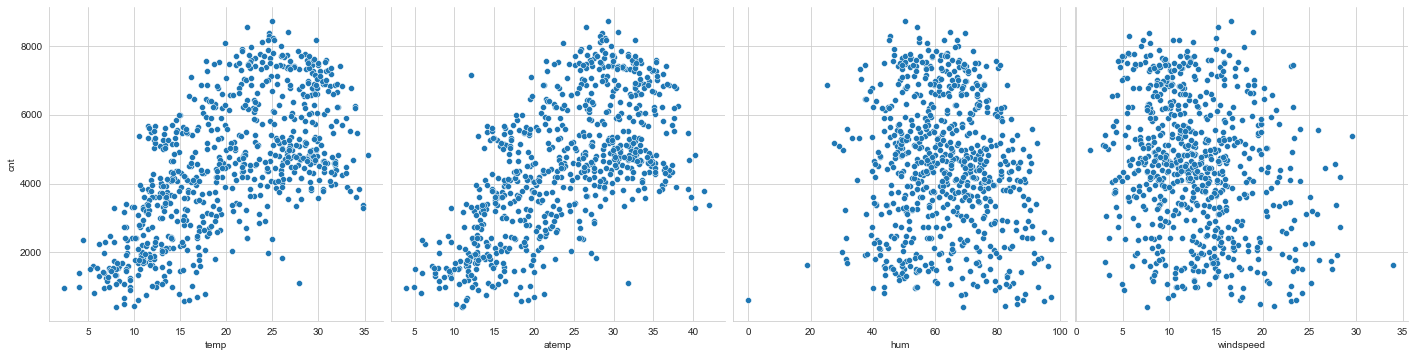

In [1123]:
#Bivariate Analysis
#Let's make a pairplot of all the numeric variables
#sns.pairplot(bikedf)
#plt.show()

sns.set_style("whitegrid")
sns.pairplot(data=bikedf,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

Observation: 
- The above Pair-Plot tells us that there is a LINEAR RELATION between numeric variables and 'cnt'
- This plots indicate a strong positive correlation of count with temperature, a weak positive correlation with windspeed, and a strong negative correlation with humidity.
- As the temperature increases the count of bike rental increases
- With increasing humidity, we see a decrease in the bike rental count.

The number of rentals per day seem to be increasing with temperature and adjusted temperature,also adjusted temperature and temperature have similar trends
temp vs cnt has two outliers between 15 and 30
atemp vs cnt has two outliers between 20 and 35
hum vs cnt has two outliers below 20
windspeed vs cnt has one outlier above 30

In [1335]:
## Dropping outliers in continuous variables
# outliers in temp
bikedf = bikedf.drop(index = bikedf[(bikedf['temp'] > 15) & (bikedf['temp'] < 20) & (bikedf['cnt'] < 100)].index)
bikedf = bikedf.drop(index = bikedf[(bikedf['temp'] > 25) & (bikedf['temp'] < 30) & (bikedf['cnt'] < 2000)].index)


# outliers in atemp
bikedf = bikedf.drop(index = bikedf[(bikedf['atemp'] > 20) & (bikedf['atemp'] < 25) & (bikedf['cnt'] < 100)].index)
bikedf = bikedf.drop(index = bikedf[(bikedf['atemp'] > 30) & (bikedf['atemp'] < 35) & (bikedf['cnt'] < 2000)].index)


#outliers in hum
bikedf = bikedf.drop(index = bikedf[(bikedf['hum'] < 20)].index)

#outliers in windspeed
bikedf = bikedf.drop(index = bikedf[(bikedf['windspeed'] > 30)].index)

C:\Temp\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


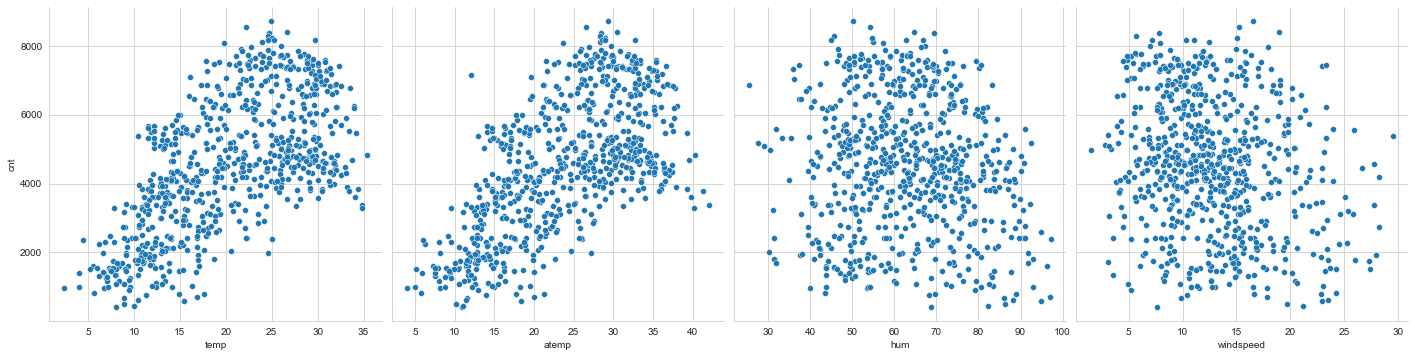

In [1186]:
sns.set_style("whitegrid")
sns.pairplot(data=bikedf,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

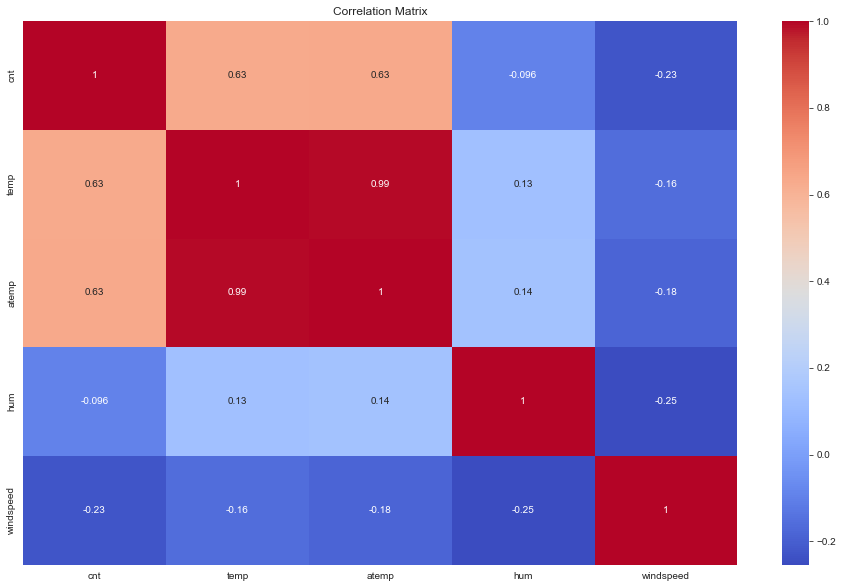

In [1277]:
# Looking at correlation with continuous variables 
plt.figure(figsize = (16, 10))
correlation_matrix = bikedf[['cnt','temp','atemp','hum','windspeed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

adjusted temperature has the highest positive correlation with cnt followed by temperature.
hum has the lowest correlation.


In [891]:
# correlation between ```temp``` and ```atemp```
data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991727
atemp,0.991727,1.000000


Since, the correlation between temp and atemp is almost 1, one of them could be dropped.We can remove atemp as actual temperature ("temp") is often more interpretable and straightforward for analysis because it directly represents the temperature recorded.

In [1336]:
bikedf = bikedf.drop(["atemp"], axis = 1)

In [892]:
bikedf[['temp','hum','windspeed']].corr()
#There's no signifcant correlation between atemp and hum , windspeed.Hence these are not dropped for now.

,temp,hum,windspeed
temp,1.000000,0.124526,-0.160187
hum,0.124526,1.000000,-0.246512
windspeed,-0.160187,-0.246512,1.000000


In [1188]:
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,season_spring,0,january,0,6,0,weather_Mist,14.110847,80.5833,10.749882,985
1,season_spring,0,january,0,0,0,weather_Mist,14.902598,69.6087,16.652113,801
2,season_spring,0,january,0,1,1,weather_clear,8.050924,43.7273,16.636703,1349
3,season_spring,0,january,0,2,1,weather_clear,8.200000,59.0435,10.739832,1562
4,season_spring,0,january,0,3,1,weather_clear,9.305237,43.6957,12.522300,1600


[Text(0.5, 1.0, 'Count of bikes during weekdays based on temperature')]

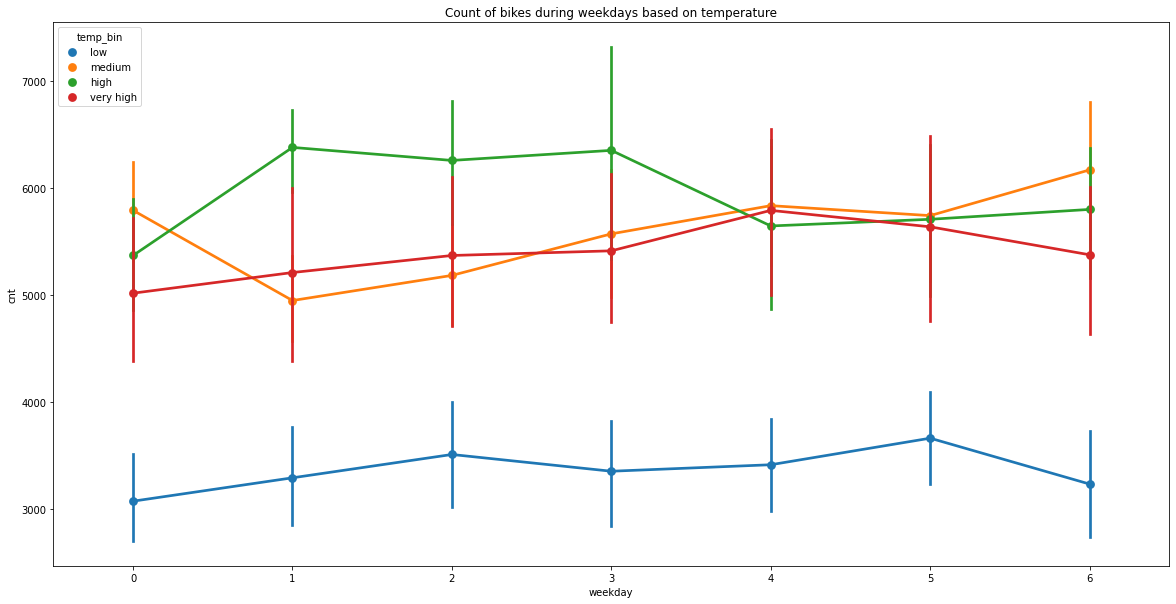

In [24]:
#multivariate analysis
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=bikedf, x='weekday', y='cnt', hue='temp_bin', ax=ax)
ax.set(title='Count of bikes during weekdays based on temperature')


As the temperature increases the count of bike rental increases and for cold temperature there is a decline in count of bike rental.

In [899]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 726 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      726 non-null    object 
 1   yr          726 non-null    int64  
 2   mnth        726 non-null    object 
 3   holiday     726 non-null    int64  
 4   weekday     726 non-null    int64  
 5   workingday  726 non-null    int64  
 6   weathersit  726 non-null    object 
 7   temp        726 non-null    float64
 8   atemp       726 non-null    float64
 9   hum         726 non-null    float64
 10  windspeed   726 non-null    float64
 11  cnt         726 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 73.7+ KB


### Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

In the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. 

if there are n categories, number of dummies will be n-1


In [156]:
pd.get_dummies(bikedf['season']).astype(int)

,season_fall,season_spring,season_summer,season_winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


Now, we don't need four columns. We can drop first column, as the type of season as spring can be identified with just the last three columns. if all 3 columns has value as zero, then it is spring season


In [1337]:
season_type = pd.get_dummies(bikedf['season'], drop_first = True).astype(int)
season_type.head()

,season_spring,season_summer,season_winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [1338]:
bikedf = pd.concat([bikedf, season_type], axis = 1)

In [737]:
pd.get_dummies(bikedf['weathersit']).astype(int)

,weather_Mist,weather_clear,weather_light_snow_rain
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,0,1,0


Now, we donot need three columns. We can drop first column, as the type of whether as clear(Clear, Few clouds, Partly cloudy, Partly cloudy) can be identified with just the last two columns. if all 2 columns has value as zero, then it is clear weather.
Also it is better to short names to weather mapping

In [1339]:
#weathersit_mapping= {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

weather_type = pd.get_dummies(bikedf['weathersit'], drop_first = True).astype(int)
weather_type.head()

,weather_clear,weather_light_snow_rain
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [1340]:
bikedf = pd.concat([bikedf, weather_type], axis = 1)

In [1341]:
#Handling month
month_type = pd.get_dummies(bikedf['mnth'], drop_first = True).astype(int)
month_type.head()
bikedf = pd.concat([bikedf, month_type], axis = 1)

In [1342]:
#Handling weekdays
weekday_type = pd.get_dummies(bikedf['weekday'], drop_first = True).astype(int)
weekday_type.rename(columns={1:"day1", 2:"day2",3:"day3", 4:"day4",5:"day5", 6:"day6"},inplace=True)
weekday_type.head()
bikedf = pd.concat([bikedf, weekday_type], axis = 1)

In [1343]:
 bikedf = bikedf.drop(['weathersit','season','mnth','weekday'],axis=1) 

In [1344]:
#Holiday can be dropped as it is a non working day and it is captured in workingday column
bikedf = bikedf.drop(['holiday'],axis=1) 

In [1345]:
bikedf.head()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weather_clear,...,may,november,october,september,day1,day2,day3,day4,day5,day6
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Splitting the Data into Training and Testing Sets

In [1427]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
#df_train, df_test = train_test_split(bikedf, train_size = 0.7, test_size = 0.3, random_state = 100,stratify=None)

np.random.seed(0)
df_train, df_test = train_test_split(bikedf, train_size = 0.70, test_size = 0.30, random_state = 42)

# Rescaling the Features

In [672]:
from sklearn.preprocessing import MinMaxScaler

In [1347]:
scaler = MinMaxScaler()

In [1428]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = [ 'temp','hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])



### Dividing into X and Y sets for the model building

In [1429]:
y_train = df_train.pop('cnt')
X_train = df_train

# Building a linear model

In [1313]:
import statsmodels.api as sm

Recursive feature elimination

In [1051]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1430]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
X_train.columns = X_train.columns.astype(str)
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=13)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=13)

In [1351]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
# below are the variable which are selected

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('weather_clear', True, 1),
 ('weather_light_snow_rain', True, 1),
 ('august', False, 11),
 ('december', True, 1),
 ('february', False, 13),
 ('january', False, 15),
 ('july', True, 1),
 ('june', False, 14),
 ('march', False, 3),
 ('may', False, 4),
 ('november', True, 1),
 ('october', False, 5),
 ('september', False, 2),
 ('day1', False, 7),
 ('day2', False, 6),
 ('day3', False, 8),
 ('day4', False, 10),
 ('day5', False, 9),
 ('day6', True, 1)]

In [1431]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weather_clear', 'weather_light_snow_rain', 'december',
       'july', 'november', 'day6'],
      dtype='object')

In [1407]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'august', 'february', 'january', 'june', 'march',
       'may', 'october', 'september', 'day1', 'day2', 'day3', 'day4', 'day5'],
      dtype='object')

In [1432]:
# Calculate the VIFs for the  model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,17.23
3,hum,11.79
1,workingday,5.00
4,windspeed,4.81
7,weather_clear,3.90
5,season_spring,2.64
6,season_winter,2.62
0,yr,2.10
12,day6,1.78
11,november,1.62


# Building model using statsmodel, for the detailed statistics

Model 1

In [1433]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     205.9
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          2.11e-189
Time:                        08:42:35   Log-Likelihood:                 485.71
No. Observations:                 506   AIC:                            -943.4
Df Residuals:                     492   BIC:                            -884.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Model 2

In [1434]:
#Removing the variable 'hum' based on its High 'VIF' value.Even though temp has highesht VIF, we are removing hum as temp will have dependency
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [1394]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'weather_clear', 'weather_light_snow_rain', 'december',
       'july', 'november', 'day6'],
      dtype='object')

In [1435]:
# Calculate the VIFs for the  model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.94
3,temp,3.40
5,season_spring,2.78
6,season_winter,2.10
2,workingday,1.66
12,day6,1.65
11,november,1.55
10,july,1.31
9,december,1.29
7,weather_clear,1.12


In [1436]:
# Adding a constant variable 
import statsmodels.api as sm 
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     215.4
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          2.92e-187
Time:                        08:43:36   Log-Likelihood:                 477.82
No. Observations:                 506   AIC:                            -929.6
Df Residuals:                     493   BIC:                            -874.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [1437]:
X_train_lm2.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'weather_clear', 'weather_light_snow_rain', 'december',
       'july', 'november', 'day6'],
      dtype='object')

Model 3

In [1438]:
#dropping winter as december is already part of model
X_train_new = X_train_new.drop(['season_winter'], axis=1)


In [1439]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.15
3,temp,2.93
5,season_spring,2.10
2,workingday,1.66
11,day6,1.65
10,november,1.34
9,july,1.31
8,december,1.21
6,weather_clear,1.12
7,weather_light_snow_rain,1.10


In [1415]:
# Adding a constant variable 
import statsmodels.api as sm 
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     222.5
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          2.06e-183
Time:                        08:40:26   Log-Likelihood:                 465.89
No. Observations:                 506   AIC:                            -907.8
Df Residuals:                     494   BIC:                            -857.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [1401]:
#X_train_new = X_train_new.drop(['const'], axis=1)

In [1440]:
selected_features=X_train_new.columns

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [1441]:
y_train_pred = lm3.predict(X_train_lm3)

In [1467]:
df_train.head()

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weather_clear,weather_light_snow_rain,...,may,november,october,september,day1,day2,day3,day4,day5,day6
331,0,1,0.553679,0.680570,0.285636,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
452,1,1,0.542077,0.257541,0.709157,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
106,0,0,0.495350,0.313804,0.670619,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
116,0,1,0.698871,0.809165,0.691384,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
655,1,1,0.577381,0.660092,0.511832,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


C:\Users\tjacobkannampilly\AppData\Local\Temp\ipykernel_31060\2869572052.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

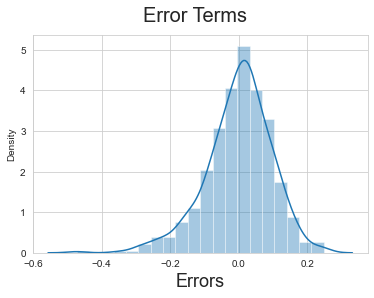

In [1443]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms are normally distributed with mean zero

In [1444]:
# Calculate the residuals
residuals = lm3.resid

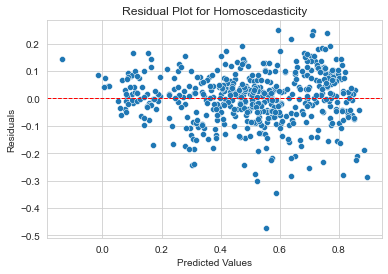

In [1445]:
# Create a scatterplot of residuals against the predicted values
sns.scatterplot(x=lm3.fittedvalues, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Add a horizontal line at y=0
plt.show()

This shows error terms have constant variance

In [1421]:
# Mean of Residuals
(y_train-y_train_pred).mean()

7.951478737631556e-16

Residual errors follow a normal distribution with mean=0
Variance of Errors doesnt follow any trends
Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

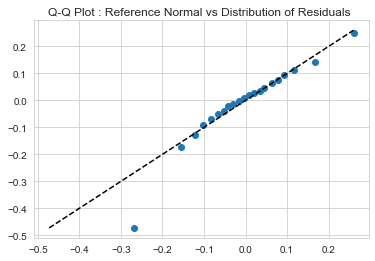

In [1422]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()

This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data. Extrapolated points show significant predict inaccuracy.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

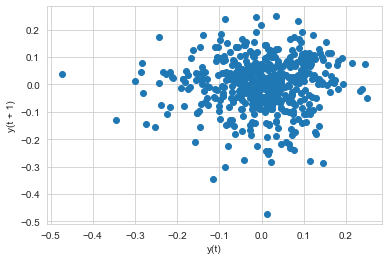

In [1423]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

Lagplot of residuals shows no trend. Hence the error terms have constant variance


In [1457]:
# Fit the Linear Regression model
model = sm.OLS(y_train, X_train).fit()

# Perform the Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model.resid)

# Print the Durbin-Watson statistic
print(f"Durbin-Watson Statistic: {durbin_watson_statistic}")

# Interpret the results
if durbin_watson_statistic < 1.5:
    print("Positive autocorrelation may be present.")
elif durbin_watson_statistic > 2.5:
    print("Negative autocorrelation may be present.")
else:
    print("No significant autocorrelation detected.")


Durbin-Watson Statistic: 1.9857584576363367
No significant autocorrelation detected.


#### Hence, assumptions of Linear Regression are satisfied by this model

# Making Predictions
Applying the scaling on the test sets

In [1446]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

Dividing into X_test and y_test

In [1447]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1449]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'weather_clear', 'weather_light_snow_rain', 'december', 'july',
       'november', 'day6'],
      dtype='object')

In [1451]:
X_test = sm.add_constant(X_test)

In [1452]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1453]:
# Making predictions
y_pred = lm3.predict(X_test_new)

# Model Evaluation¶

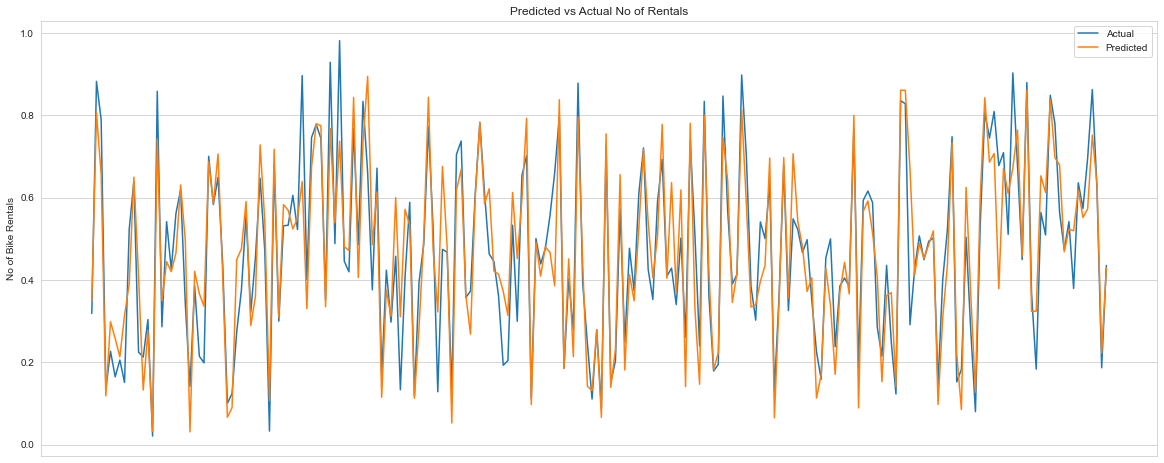

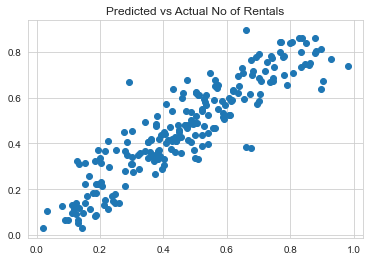

In [1454]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

#plt.figure(figsize=[8,8])
plt.scatter(y_test,y_pred);
plt.title('Predicted vs Actual No of Rentals');

Predicted vs observed value plots shows that the model is reasonably accurate.

In [1475]:
# calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07107789540364261
MSE: 0.008820882986842273
RMSE: 0.09391955593401341


In [1474]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
rsquared_test = r2_score(y_test, y_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))

R-squared for train data: 0.83
R-squared for test data: 0.82


As we can see that the difference between the R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model .

In [1478]:
r2=0.82
n = X_test_new.shape[0]      # n is number of rows in X_test_new
p = X_test_new.shape[1]     # p= Number of features/predictors which is number of columns in X_test_new

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R-squared for test data:',round(adjusted_r2,2))

R-squared for test data: 0.81


# Model Stability

In [1379]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.86845008, 0.82900865, 0.79391604, 0.84829433, 0.82966869,
       0.78424962, 0.79136374, 0.81232529, 0.82679931, 0.79447084])

In [1380]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.82 (+/- 0.05)


In [1246]:
selected_features

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'weather_clear', 'weather_light_snow_rain', 'december', 'july',
       'november', 'day6'],
      dtype='object')

# Conclusion

The data set is randomly divided into training and test data. Final Model built on training data set explains 83% of the variability and achieves 82% on test data.

The final relationship between demand and predictors is as follows.

cnt=0.1795+(0.3683×temp)+(0.2460×yr)+(0.0647×workingday)-(0.1235×windspeed)-(0.1987×season_spring)-(0.0896×July)-(0.0485×November)-(0.0523xDecember) +(0.0603×day6) + ( 0.0898×weather_clear) − (0.1743×weather_light_snow_rain)

Note :

- Data has been cleaned to drop outliers that might affect the model adversely
- The model has been verified for Multicollinearity effects.
- Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)
- Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all - interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability.
- Further Lag plot shows there is no auto-correlation in data.
- Model is stable at 81%(+/-14%) coefficient of determination at 95% CI, ascertained through cross validation.
- Features in the order of influence has been reported by standardizing all predictor values.